In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\SA Task 2 assignment.csv")


In [4]:
df.columns

Index(['Event id', 'Opened date', 'CAUSAL_VERBATIM', 'CORRECTION_VERBATIM',
       'CUSTOMER_VERBATIM', 'BUILD_DATE', 'BUILD_PLANT_DESC', 'CAUSAL_CD_DESC',
       'COMPLAINT_CD_DESC', 'IN_USE_DATE', 'MAKE', 'MODEL', 'MODLYR', 'PLANT',
       'Trigger', 'Failure Component', 'Failure Condition',
       'Additional Context', 'Fix Component', 'Fix Condition'],
      dtype='object')

## Checking NAN values

In [5]:
df.isna().sum()

Event id                 0
Opened date              0
CAUSAL_VERBATIM          1
CORRECTION_VERBATIM      0
CUSTOMER_VERBATIM        0
BUILD_DATE               0
BUILD_PLANT_DESC         0
CAUSAL_CD_DESC           3
COMPLAINT_CD_DESC        0
IN_USE_DATE              1
MAKE                     0
MODEL                    0
MODLYR                   0
PLANT                    0
Trigger                995
Failure Component      995
Failure Condition      995
Additional Context     995
Fix Component          995
Fix Condition          995
dtype: int64

In [9]:
df[df['CAUSAL_CD_DESC'].isna()]

,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT,Trigger,Failure Component,Failure Condition,Additional Context,Fix Component,Fix Condition
14,D-15075,3/15/2021,checked and found radio display will come on a...,replaced radio module programmed radio using ...,C S RADIO WILL NOT COME ON SCREEN IS JUST DARK,2019-08-23T00:00:00.000Z,Spring Hill - Truck,NaN,Audio/Entertainment/Navigation - Audio,NaN,ThunderVolt,HyperFury X,2020,SHT,NaN,NaN,NaN,NaN,NaN,NaN
370,D-15326,5/27/2020,#,VEHICLE ARRIVED WITH CUSTOMER STATING RADIO IS...,CUSTOMER STATES THE RADIO DOES NOT WORK. PLEAS...,2019-09-03T00:00:00.000Z,Flint,NaN,Audio/Entertainment/Navigation - Other issues,2019-12-03T00:00:00.000Z,NovaSprint,NebulaJet,2020,FLT,NaN,NaN,NaN,NaN,NaN,NaN
599,D-15122,6/4/2020,software update,performed bulletin search scan tests reprogram...,C S THE XM RADIO BACK UP SCREEN TWICE FREEZES UP,2019-08-26T00:00:00.000Z,Fort Wayne,NaN,Audio/Entertainment/Navigation - Communication,2020-04-03T00:00:00.000Z,ThunderVolt,QuantumRider,2020,FTW,NaN,NaN,NaN,NaN,NaN,NaN


#### Chacking unique values

In [10]:
df['MAKE'].unique()

array(['NovaSprint', 'NebulaCruiser', 'ThunderVolt', 'TurboFlux'],
      dtype=object)

In [11]:
df['MODEL'].unique()

array(['AeroSpecter', 'StellarGlide', 'HyperFury X', 'TurboFlare',
       'ShadowPulse', 'FusionNova', 'GalacticRoamer', 'NebulaJet',
       'SolarStriker', 'QuantumRider', 'OrionScout', 'PhotonChaser',
       'ElectroStreak', 'InfinityRider', 'CelestialVortex',
       'ThunderBlitz', 'InfernoSprint', 'ZenithCruiser', 'WarpDriveX',
       'QuantumGlider', 'MirageQuest', 'AstroStinger', 'CosmicRipple'],
      dtype=object)

### Assuming opened date is when the issue is reported and build date is when product was build

#### NOrmalizing them and Subtracting them to know which products did not perform good that too unexpectedly early  

In [12]:
df['Opened date'] = pd.to_datetime(df['Opened date'], errors='coerce').dt.tz_localize(None)
df['BUILD_DATE'] = pd.to_datetime(df['BUILD_DATE'], errors='coerce').dt.tz_localize(None)

df['time_period'] = (df['Opened date'] - df['BUILD_DATE']).dt.days


In [13]:
df[df['time_period'] < 60]

,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,...,MODEL,MODLYR,PLANT,Trigger,Failure Component,Failure Condition,Additional Context,Fix Component,Fix Condition,time_period
0,D-14801,2019-09-17,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-10T00:00:00.000Z,...,AeroSpecter,2020,FLT,['No Additional Functionality'],"['Audio Unit', 'Display']","['Controls Irresponsive', 'Black Screen']",['No Additional Context'],"['Radio', 'SPS']","['Replaced', 'Programmed']",34
77,D-14719,2019-10-04,RADIO DISPLAY REPLACEMENT PER TAC,PULLED VEHICLE INTO SERVICE BAY AND WERE UNABL...,CUSTOMER STATES WHILE USING THE BACKUP CAMERA ...,2019-08-12,Spring Hill - Truck,Module/Component-Shorted,Features/Controls/Displays - Other issues,2019-08-31T00:00:00.000Z,...,ElectroStreak,2020,SHT,NaN,NaN,NaN,NaN,NaN,NaN,53
98,D-14671,2019-09-19,INTERNAL FAULT IN RADIO WCC#,REPLACED AND PROGRAMMED RADIO. VERIFIED REPAIR...,( )(R-N) RADIO SCREEN WILL BLANK OUT MINS IN...,2019-08-09,Lansing Delta,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-09-18T00:00:00.000Z,...,SolarStriker,2020,DEL,NaN,NaN,NaN,NaN,NaN,NaN,41
128,D-14461,2019-08-27,COAX BOSS ON RADIO LOOSE CAUSING POOR CONNECTI...,DIAG. REARVIEW CAMERA INOP. TEST AND FOUND DTC...,SALES STATES WHEN BACKING UP REARVIEW CAMERA I...,2019-08-01,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Video,2019-08-27T00:00:00.000Z,...,HyperFury X,2020,FLT,NaN,NaN,NaN,NaN,NaN,NaN,26
161,D-14534,2019-09-03,RADIO INTERNAL PROBLEM.,"CHECKED, FOUND AUDIO IS CUTTING OUT ON ALL X...",CUSTOMER STATES THE XM RADIO CUTS IN AND OUT A...,2019-08-05,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-26T00:00:00.000Z,...,AeroSpecter,2020,FLT,NaN,NaN,NaN,NaN,NaN,NaN,29
263,D-15157,2019-10-15,"VERIFIED THE CUSTOMERS CONCERN, THE INFOTAINME...",REMOVED AND REPLACED THE INFO SCREEN PER DOCUM...,SALESMAN BROUGHT DOWN INFOTAINMENT SCREEN WILL...,2019-08-27,Silao,Module/Component-Shorted,Audio/Entertainment/Navigation - Audio,2019-10-16T00:00:00.000Z,...,AeroSpecter,2020,SIL,NaN,NaN,NaN,NaN,NaN,NaN,49
270,D-15399,2019-10-19,Checked for dtcs with GDS found Radio ECU ...,Replaced the Radio and programmed Radio infota...,cust states touch screen in op check and advise,2019-09-06,Ramos Arizpe,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Communication,2019-12-18T00:00:00.000Z,...,TurboFlare,2020,RAM,NaN,NaN,NaN,NaN,NaN,NaN,43
280,D-14684,2019-08-27,lost of eithernet communication with radio fal...,needs amplifier,Added Operation No Sound From Radio Tech Cause...,2019-08-10,Fort Wayne,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Audio,2020-01-06T00:00:00.000Z,...,NebulaJet,2020,FTW,NaN,NaN,NaN,NaN,NaN,NaN,17
285,D-15376,2019-10-31,TAC #,CHECKED FOR CODES. NOT CODES FOUND. NO BULLETI...,RADIO SCREEN BLACK BUT COULD HE MUSIC,2019-09-05,Spring Hill - Truck,Other-No trouble found - adjusted / reprogrammed,Audio/Entertainment/Navigation - Communication,2019-09-24T00:00:00.000Z,...,MirageQuest,2020,SHT,NaN,NaN,NaN,NaN,NaN,NaN,56
290,D-14772,2019-08-30,Found the radio will not turn on Has a lost ...,Replaced and programmed the radio reinstalled ...,FOUND THAT THE RADIO WILL NOT TURN ON VERIFIED...,2019-08-13,Flint,Other-Follow operation,Audio/Entertainment/Navigation - Audio,2019-10-17T00:00:00.000Z,...,PhotonChaser,2020,FLT,NaN,NaN,NaN,NaN,NaN,NaN,17


#### * It can be seen from the data that most of the products that had some issue within 60 days is - Audio/Entertainment/Navigation 

In [14]:
filtered_df = df[df['time_period'] < 60].groupby('MODEL').count()


### Shown below is the frequency chart for the models that had some errors within 60 days

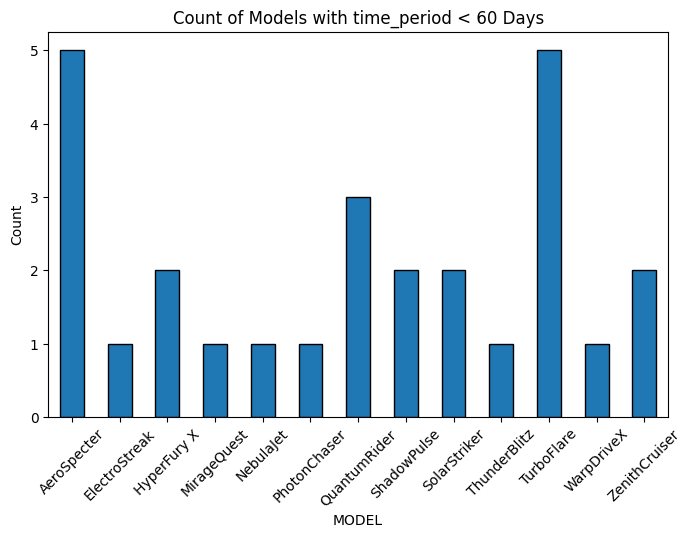

In [15]:
plt.figure(figsize=(8, 5))
filtered_df['time_period'].plot(kind='bar',edgecolor='black')

plt.xlabel("MODEL")
plt.ylabel("Count")
plt.title("Count of Models with time_period < 60 Days")
plt.xticks(rotation=45)  # better label visibility

# Show the plot
plt.show()


#### I believe knowing about the model, the make and COMPLAINT_CD_DESC will help understand where exactly is the problem that is happening frequently.  For instance here Audio/Entertainment/Navigation - Audio = 337 has the max complaints

In [16]:
df['COMPLAINT_CD_DESC'].value_counts()

COMPLAINT_CD_DESC
Audio/Entertainment/Navigation - Audio                337
Audio/Entertainment/Navigation - Other issues         263
Audio/Entertainment/Navigation - Communication        194
Audio/Entertainment/Navigation - Video                103
Features/Controls/Displays - Other issues              47
Audio/Entertainment/Navigation - Navigation            32
Features/Controls/Displays - Gauges/Warning Lights     12
 Audio/Entertainment/Navigation - Abnormal Noise       11
Features/Controls/Displays - Odometer                   1
Name: count, dtype: int64

## TEXT MINING

In [17]:
df['CAUSAL_VERBATIM'] = df['CAUSAL_VERBATIM'].fillna("")
## Just this column had nan value that too just 1 so filling it with a blank string before merging it with other text columns

In [18]:
df['full_text'] = (
    df['CAUSAL_VERBATIM'].str.strip() + " " +
    df['CORRECTION_VERBATIM'].str.strip() + " " +
    df['CUSTOMER_VERBATIM'].str.strip()
)

### Using DeepSeek opensource model through Ollama for extracting keywords and important insights from the text present in the dataset

In [7]:
import langchain
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
import regex as re

In [8]:
selected_model = "deepseek-r1:1.5b"
llm_engine = ChatOllama(
    model=selected_model,
    base_url = "http://localhost:11434",
    temperature = 0.1)


#system prompt -> how this llm should react

system_prompt = """
You are a Senior Data Scientist analyzing product failure reports. Your task is to extract the following insights from the input text:

1. **Failure Component**: Which component failed? (e.g., ["Audio Unit", "Display"])
2. **Failure Condition**: What was the condition of the failure? (e.g., ["Controls Irresponsive", "Black Screen"])
3. **Fix Component**: Which component was fixed or replaced? (e.g., ["Radio", "SPS"])
4. **Fix Condition**: What was done to fix the issue? (e.g., ["Replaced", "Programmed"])

**Output Rules:**
- Always return a list in the following exact format:
  **Failure Component**:[], **Failure Condition**:[], **Fix Component**:[], **Fix Condition**:[]
- The `**` around each field (e.g., **Failure Component**) are **mandatory** and must not be omitted. They are critical for parsing the output.
- If any of the required information is not found in the text, use `["Not mentioned"]` for that field.
- Do not add any extra text or explanations. Only return the list in the specified format.

**Examples:**

1. Input: "The audio unit failed because the controls were irresponsive. The radio was replaced to fix the issue."
   Output: **Failure Component**:["Audio Unit"], **Failure Condition**:["Controls Irresponsive"], **Fix Component**:["Radio"], **Fix Condition**:["Replaced"]

2. Input: "The display had a black screen issue. The SPS was programmed to resolve the problem."
   Output: **Failure Component**:["Display"], **Failure Condition**:["Black Screen"], **Fix Component**:["SPS"], **Fix Condition**:["Programmed"]

3. Input: "The power supply unit overheated and stopped working. It was replaced with a new unit."
   Output: **Failure Component**:["Power Supply Unit", "Radio"], **Failure Condition**:["Overheated"], **Fix Component**:["Power Supply Unit"], **Fix Condition**:["Replaced"]

4. Input: "The device stopped working, but no further details were provided."
   Output: **Failure Component**:["Not mentioned"], **Failure Condition**:["Not mentioned"], **Fix Component**:["Not mentioned"], **Fix Condition**:["Not mentioned"]

**Task:**
Analyze the input text and extract the required insights. Always return the output in the specified format, strictly use `["Not mentioned"]` for any missing information.
Do not omit the `**` around each field.
"""



chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{input}")
])

def clean_output(output):
    issue_match = re.search(r"Issue: (.+)", output)
    solution_match = re.search(r"Solution: (.+)", output)
    
    issue = issue_match.group(1).strip() if issue_match else "No issue found."
    solution = solution_match.group(1).strip() if solution_match else "No solution found."
    
    return issue, solution

    
def generate_ai_response(prompt):
    # Create the processing pipeline
    processing_pipeline = chat_prompt | llm_engine | StrOutputParser()
    # Invoke the pipeline with the input prompt
    raw_output = processing_pipeline.invoke({"input": prompt})
    # Clean the output to extract only the issue and solution
    return raw_output

In [19]:
def identify_pattern(pattern_for):
    pattern = fr"\*\*{pattern_for}\*\*:\s*(\[[^\]]*\])"
    return pattern

def matching_regex(pattern_for, text):
    match = re.search(identify_pattern(pattern_for), text)
    if match:
        return match.group(1)  # Extract full list including brackets
    else:
        return ["Not specified"]


### Taking a subset of full dataset because using deepseek on full data was taking a lot of time and not computationally supported by my machine

In [20]:
small_df = df.iloc[:30]

In [21]:
from tqdm import tqdm

tqdm.pandas()  

small_df['llm_output'] = small_df['full_text'].progress_apply(generate_ai_response)


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [21:38<00:00, 43.28s/it]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10628\1218428861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['llm_output'] = small_df['full_text'].progress_apply(generate_ai_response)


In [22]:
small_df.drop(['Trigger', 'Failure Component', 'Failure Condition', 'Additional Context', 'Fix Component','Fix Condition','CAUSAL_VERBATIM', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM'], axis=1, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10628\3375527302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df.drop(['Trigger', 'Failure Component', 'Failure Condition', 'Additional Context', 'Fix Component','Fix Condition','CAUSAL_VERBATIM', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM'], axis=1, inplace=True)


In [23]:
small_df.loc[:,'failure_component'] = small_df['llm_output'].apply(lambda x: matching_regex("Failure Component", x))
small_df.loc[:, 'failure_condition'] = small_df['llm_output'].apply(lambda x: matching_regex("Failure Condition", x))
small_df.loc[:,'fix_component'] = small_df['llm_output'].apply(lambda x: matching_regex("Fix Component", x)) 
small_df.loc[:,'fix_condition'] = small_df['llm_output'].apply(lambda x: matching_regex("Fix Condition", x))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10628\1308562044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df.loc[:,'failure_component'] = small_df['llm_output'].apply(lambda x: matching_regex("Failure Component", x))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10628\1308562044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df.loc[:, 'failure_condition'] = small_df['llm_output'].apply(lambda x: matching_regex("Failure Condition", x))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1062

In [25]:
small_df.columns

Index(['Event id', 'Opened date', 'BUILD_DATE', 'BUILD_PLANT_DESC',
       'CAUSAL_CD_DESC', 'COMPLAINT_CD_DESC', 'IN_USE_DATE', 'MAKE', 'MODEL',
       'MODLYR', 'PLANT', 'time_period', 'full_text', 'llm_output',
       'failure_component', 'failure_condition', 'fix_component',
       'fix_condition'],
      dtype='object')

In [26]:
final_df = small_df[['Event id', 'Opened date', 'BUILD_DATE', 'BUILD_PLANT_DESC',
       'CAUSAL_CD_DESC', 'COMPLAINT_CD_DESC', 'IN_USE_DATE', 'MAKE', 'MODEL',
       'MODLYR', 'PLANT', 'time_period',
       'failure_component', 'failure_condition', 'fix_component',
       'fix_condition']]

In [27]:
final_df.head()

,Event id,Opened date,BUILD_DATE,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT,time_period,failure_component,failure_condition,fix_component,fix_condition
0,D-14801,2019-09-17,2019-08-14,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-10T00:00:00.000Z,NovaSprint,AeroSpecter,2020,FLT,34,"[""Audio Unit""]","[""Controls Irresponsive""]","[""Radio""]","[""Replaced""]"
1,D-14869,2020-07-06,2019-08-16,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2020-03-26T00:00:00.000Z,NebulaCruiser,StellarGlide,2020,FTW,325,"[""Radio"", ""SPS""]","[""Controls Irresponsive"", ""Black Screen"", ""Ove...","[""Radio"", ""SPS""]","[""Replaced"", ""Programmed"", ""Replaced""]"
2,D-14555,2020-01-09,2019-08-06,Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,2019-11-29T00:00:00.000Z,ThunderVolt,HyperFury X,2020,FLT,156,[Not specified],[Not specified],[Not specified],[Not specified]
3,D-14704,2020-04-14,2019-08-12,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,2019-12-26T00:00:00.000Z,ThunderVolt,HyperFury X,2020,SHT,246,"[""Audio Unit""]","[ ""Controls Irresponsive""]","[ ""Radio""]","[ ""Replaced""]"
4,D-15142,2020-11-23,2019-08-27,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-10-31T00:00:00.000Z,ThunderVolt,TurboFlare,2020,FTW,454,"[""Vehicles""]","[""SATELLITE Radio malfunctioned""]","[""Radio Unit""]","[""USB File Transfer Update""]"


I have used DeepSeek R1 model for the extraction of key information present in the text like the failure component, failure condition and the respective fixes as can be seen in the above df